# Calculs de regression
Dans cette activité, nous allons programmer en Python quelques fonctions qui permettent, de manière simple, de calculer et d'utiliser l'équation de la droite de regression entre deux variables. 
Plusieurs libraires proposent des fonctions pour calculer une regression. Mais ces fonctions sont souvent peu intuitives d'utilisation. Et l'intérêt ici n'est pas seulement de mettre en œuvre les résultats, mais surtout de programmer nos propres fonctions. 

## 1. Fabriquons nos outils

La cellule suivante permet d'importer la fonction `sqrt`, et de charger les biblothèques utiles.

In [1]:
from math import sqrt
import matplotlib.pyplot as plt
from IPython.display import IFrame

### Exercice 1
Les consignes seront disponibles après avoir éxécuté la cellule ci-dessous. 

In [2]:
IFrame('https://www.codepuzzle.io/IPK7M6S', width='100%', height=600)

Recopiez ensuite le code de la fonction 'moyenne' obtenu dans la cellule ci-dessous pour pouvoir l'utiliser par la suite.

In [2]:
def moyenne(X):
    M = 0
    for k in X:
        M = M+k
    return M/len(X)

### Exercice 2
Les consignes seront disponibles après avoir éxécuté la cellule ci-dessous. 

In [4]:
IFrame('https://www.codepuzzle.io/IPLNV45', width='100%', height=600)

Recopiez ensuite le code de la fonction 'cov' obtenu dans la cellule ci-dessous pour pouvoir l'utiliser par la suite.

In [3]:
def cov(X,Y):
    assert len(X)==len(Y)
    SommeProd = 0
    for i in range(len(X)):
        SommeProd += X[i]*Y[i]
    return SommeProd/len(X) - moyenne(X)*moyenne(Y)

### Les autres fonctions

In [4]:
# Equation de la droite de regression entre deux listes X et Y. 
def droitereg(X,Y):
    m = cov(X,Y)/cov(X,X)
    p = moyenne(Y)-m*moyenne(X)
    return (m, p)

In [5]:
# Coefficient de corrélation linéaire entre deux variables X et Y
def coef_r(X,Y):
    return cov(X,Y)/sqrt(cov(X,X)*cov(Y,Y))

In [6]:
# Pour faire joli...
def affichage(X,Y):
    m, p = droitereg(X,Y)
    r = coef_r(X,Y)
    print(f'y = {m}*x + {p} \n r={r}')

In [7]:
# Afficher le nuage de points
def graphe(X,Y):
    plt.clf()
    plt.scatter(X,Y, color='blue', marker='+')
    plt.grid()
    plt.show()
    return None

## 2. Un exemple d'utilisation
*Barbazo, page 266*

Le service marketing d'un centre commercial veut évaluer l'impact des frais qu'il a engagé en publicité, par mois, sur la fréquentation du centre. 
Le service a recueilli les données ci-dessous, où $x_i$ est la variable qui prend pour valeur les frais publicitaires (en milliers d'euros), et $y_i$ est la variable qui prend pour valeurs le nombre de clients qui ont fréquenté le centre commercial (en milliers).

**Vous utiliserez les fonctions définies dans la première partie pour répondre aux questions ci-dessous**

1. Représenter le nuage de points $(x_i~;~y_i)$.
3. Déterminer la valeur du coefficient de corrélation linéaire entre les variables $X$ et $Y$. Un ajustement affine est-il adapté ?
2. Déterminer l'équation de la droite de regression des moindres carrés de $Y$ en $X$.
3. Selon ce modèle, estimer le nombre de clients qui fréquenteront le centre si le service commercial engage 3.000 euros de frais publicitaires. 
4. Estimer les frais publicitaires à engager pour que le centre reçoive 300.000 clients.

In [8]:
X = [1.9, 2.4, 1.5, 0.9, 2.3, 1.7, 2.5, 1.9]
Y = [190, 250, 170, 150, 210, 180, 275, 185]

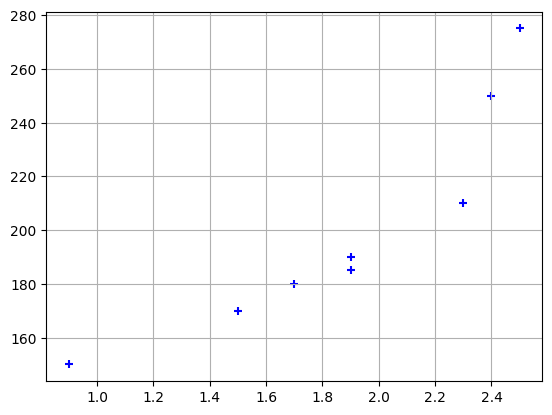

In [15]:
# 1. Tracer le nuage de points
graphe(X,Y)

**Vérifiez les résultats obtenus à l'aide d'une calculatrice.**

In [10]:
# 2. Coefficient de corrélation
coef_r(X,Y)

0.8990974319195882

La valeur de $r$, proche de 1, justifie d'utiliser un modèle de régression linéaire entre les variables X et Y. 

In [11]:
# 3. Équation de la droite de régression
affichage(X,Y)

y = 71.17460317460318*x + 66.90793650793651 
 r=0.8990974319195882


In [12]:
# 4. Extrapolation pour 3.000 euros de dépenses publitaires
m,p = droitereg(X,Y)
3*m+p

280.431746031746

Pour 3.000 euros de dépenses publicitaires, le centre peut espérer recevoir 280.400 clients.

In [13]:
# 5. Pour avoir 300.000 clients
(300-m)/p

3.4200037957866765

Pour 3.420 euros de dépenses publicitaires, le centre peut anticiper de recevoir 300.000 clients, si la tendance observée se poursuit.

## 3. En Bonus...

Le code ci-dessous permet d'afficher sur un même graphique la droite de regression et le nuage de points.

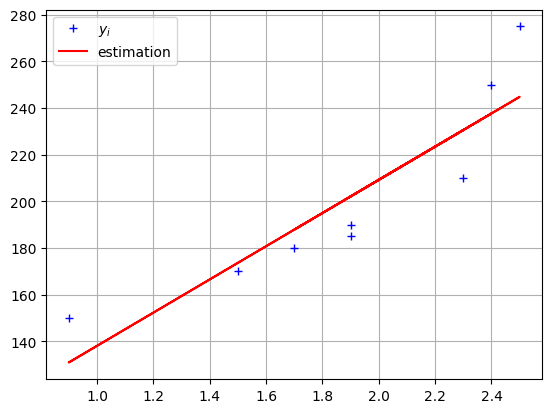

In [16]:
m, p = droitereg(X, Y)
Z = [m*x+p for x in X]
plt.clf()
plt.plot(X, Y, 'b+', label = '$y_i$')
plt.plot(X, Z, 'r-', label = 'estimation')
plt.grid()
plt.legend()
plt.show()